# Import of scripts

In [43]:
import pandas as pd;
import scipy;
import numpy as np;

import seaborn as sns;
import matplotlib.pyplot as plt;

from PIL import Image;

# Hotel Recommendation

**Step 1:** Åben csv filen og se hvad der sker \
**Step 2:** Åben h5-filen af samme datasæt \


In [44]:
store = pd.HDFStore("hotel-recommendation.hdf5");

nrows = store.get_storer("/df").nrows;

print(nrows);

37670293


In [45]:
# chunkSize = 100000;
# for i in range(nrows//chunkSize):
#     chunk = store.select("df", start = i * chunkSize, stop = (i+1) * chunkSize);

#     print(chunk);

# Load billede
**Step 1:** load et billede  \
**Step 2:** visualiser billedet \
**Step 3:** Print højde og længde på billedet

In [46]:
from PIL.ExifTags import TAGS;

img = Image.open("COVID-1.png");
# img

{}


In [48]:
width, height = img.size;

print("Image height is %i and image width is %i" % (height, width));

Image height is 299 and image width is 299


# Korrelationer og visualisering af data
Ikke et big data - datasæt, 
men et datasæt som viser nuancer af alt det der er vigtigt

In [54]:
df_redwine = pd.read_csv("winequality-red.csv");
print(df_redwine.to_string());

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates    alcohol  quality
0               7.4             0.700         0.00            1.90      0.076                 11.0                  34.0  0.99780  3.51       0.56   9.400000        5
1               7.8             0.880         0.00            2.60      0.098                 25.0                  67.0  0.99680  3.20       0.68   9.800000        5
2               7.8             0.760         0.04            2.30      0.092                 15.0                  54.0  0.99700  3.26       0.65   9.800000        5
3              11.2             0.280         0.56            1.90      0.075                 17.0                  60.0  0.99800  3.16       0.58   9.800000        6
4               7.4             0.700         0.00            1.90      0.076                 11.0                  34.0  0.99780  3.51       0.56   9.400000        

In [53]:
print(df_redwine.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [56]:
print(df_redwine["quality"].value_counts());

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


C:\Users\skole\AppData\Local\Temp\ipykernel_5104\657508670.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool);


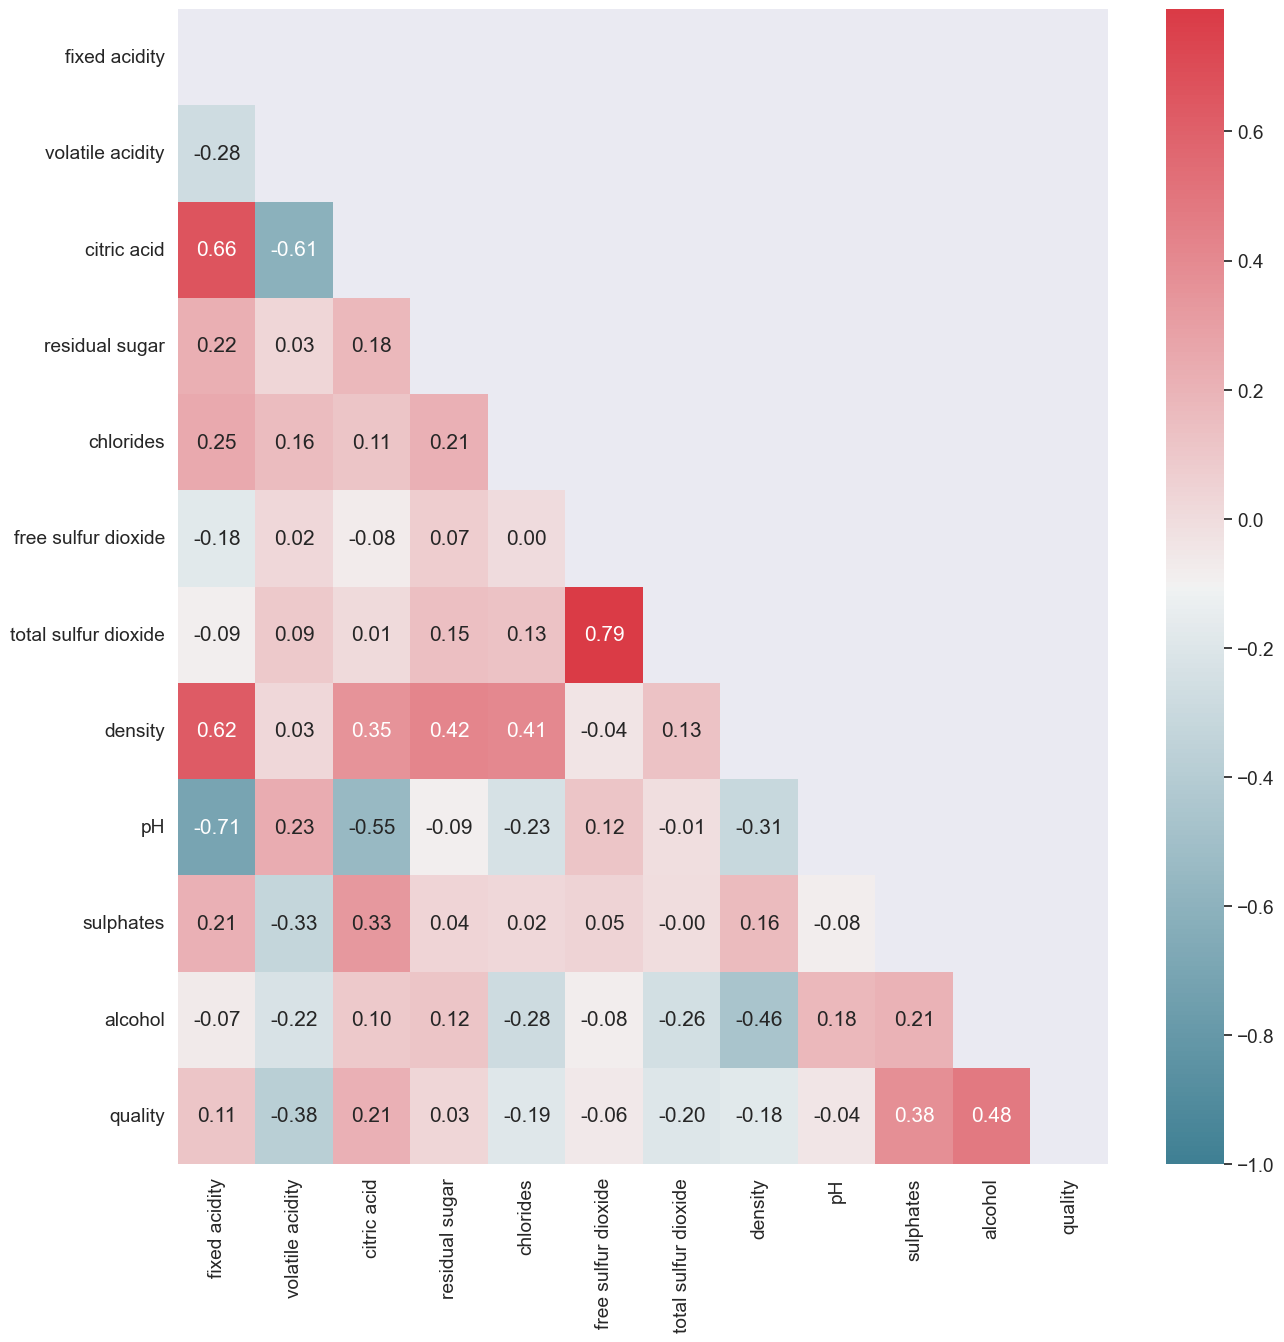

In [65]:
def heatmap(df, fig_size = 15):
    """Create a heatmap"""
    corr = df.corr(method="spearman");
    # generate a mask to remove the upper triangle (duplicate)
    mask = np.zeros_like(corr, dtype=np.bool);
    mask[np.triu_indices_from(mask)] = True;
    # set font size scale for heatmap depending on number of features
    sns.set(font_scale=fig_size / len(corr.columns));
    # generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True);
    # setup matplotlib figure
    plot, ax = plt.subplots(figsize=(fig_size, fig_size));
    # draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, vmin=-1, mask=mask, cmap=cmap, annot=True, fmt=".2f");

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set(ticks=np.arange(0.5, len(corr.columns)), ticklabels=corr.columns);

    return plt;

plot = heatmap(df_redwine);



# Forskellige plots
visualiser jeres data med forskellige plots 
- hvad fortæller de jer?

# Anomaly Påvisning
Vælg en af de forskellige anomalier, og se hvad der sker med datasættet, når anomalier er fjernet.

1. Trimmet Mean
2. Z score
3. IQR
4. IsolationForest

Trimmet gennemsnit

Z Score

IQR

Isolation Forest

# Create ML Model

Try using the raw dataset, 
z-score or iqr dataset, and see what happens with the model performance.